# Making numpy files for dashboard (Elshof)

## Here we comment out  importing a bunch of libraries we are not using, but if we want to expand the script to do things like visualization we can uncomment them and use them

### imports

In [10]:
#%matplotlib widget
#import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import sys
import os
import glob
import numpy as np
import pandas as pd

#from scipy.signal import savgol_filter
#from scipy.signal import find_peaks
#import collections
#from collections import namedtuple
import builtins
import math
# import our library as is now

import resurfemg.helper_functions as hf
import resurfemg.converter_functions as cf
from resurfemg.tmsisdk_lite import Poly5Reader
from resurfemg.config import Config

config = Config()


## Below you can load an entire directory, but in this example notebook we will do just one file. You will need to decide if you want to do this file by file, or run a loop on a directory

In [2]:
root_emg_directory = config.get_directory('root_emg_directory')

In [3]:
### For now let's do an example on just one file

In [4]:
dvrman_example = 'C:/Projects/Devent_data/Devent_ctrl5_EMG.Poly5'


 
# what is inside duiverman emg? as a reminder this is what we think
### 1 Int: EMG of intercostal muscles
### 2 F dia: EMG of frontal diaphragm
### 3 D dia: EMG of dorsal diaphragm
### 4 Abd: EMG of abdominal muscles (not always recorded)
### 5 VAR: no idea.. I have to look that up. Looking at the other arrays, it may be the EMG of the right diaphragm. Can you look at the data? Is it an EMG channel?
### 6 L Dia: EMG of left diaphragm
### 7 RMS int: root mean square of intercostal muscles (so filtered)
### 8 RMS F dia: root mean square of frontal diaphragm (so filtered)
### 9 RMS D dia: root mean square of dorsal diaphragm (so filtered)
### 10 RMS abd: root mean square of abdominal diaphragm (so filtered)
### 11 RMS R dia: root mean square of right diaphragm (so filtered)
### 12 RMS L dia: root mean square of left diaphragm (so filtered)
### 13 Paw: airway pressure (not always recorded)
### 14 Pes: esophageal pressure (not always recorded)
### 15 Pga: gastric pressure (not always recorded)
### 16 RR: respiratory rate I guess (very unreliable)
### 17 HR: heart rate (very unreliable)
### 18 Tach: number of breath I gues (also very unreliable)
 ##

In [5]:
data_emg = Poly5Reader(dvrman_example)
#data_emg = Poly5Reader(our_sample)
data_samples = data_emg.samples
emg_sample_rate = data_emg.sample_rate
converted_to_seconds =  []
converted_to_samples = []
for i in range(len(data_samples[0])):
    converted_to_seconds.append(i/emg_sample_rate)
    converted_to_samples.append(i)
data_samples = data_emg.samples
emg_sample_rate = data_emg.sample_rate
converted_to_seconds =  []
converted_to_samples = []
for i in range(len(data_samples[0])):
    converted_to_seconds.append(i/emg_sample_rate)
    converted_to_samples.append(i)

Reading file  C:/Projects/Devent_data/Devent_ctrl5_EMG.Poly5
	 Number of samples:  3502156 
	 Number of channels:  18 
	 Sample rate: 500 Hz
Done reading data.


In [6]:
data_samples.shape

(18, 3502156)

In [7]:
numpy_array = cf.poly_dvrman(dvrman_example)

Reading file  C:/Projects/Devent_data/Devent_ctrl5_EMG.Poly5
	 Number of samples:  3502156 
	 Number of channels:  18 
	 Sample rate: 500 Hz
Done reading data.


In [8]:
numpy_array.shape

(12, 3502156)

In [ ]:
## Here you can check leads one by one to make sure they are not all zeros

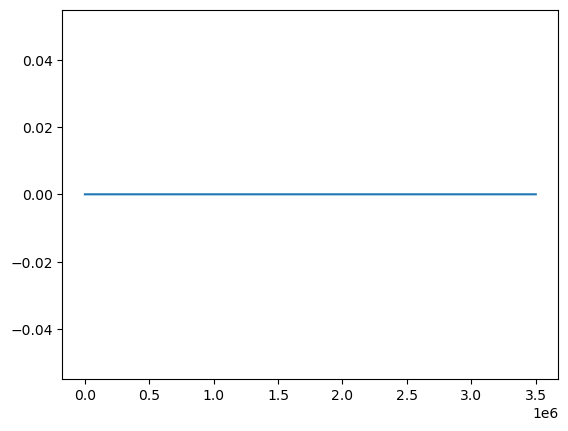

In [11]:
plt.plot(numpy_array[3])

### Below put in the name including the whole directory chain where you want the files saved off to

In [ ]:
file_name = 'C:/Projects/Devent_data/trala.npy'

In [ ]:
np.save(file_name, numpy_array)

In [14]:
numpy_array[:3]

array([[  0.91802669,   4.3595643 ,  11.89701748, ...,   0.        ,
          0.        ,   0.        ],
       [  0.87270671,   2.65343738,   6.67133141, ...,   0.        ,
          0.        ,   0.        ],
       [ -2.08440876, -10.27937317, -14.62784481, ...,   0.        ,
          0.        ,   0.        ]])

## Now let's save without our bad lead in this example

In [15]:
numpy_array_no_3 = np.vstack((numpy_array[:3],numpy_array[4:]))

In [16]:
new_file_name = 'C:/Projects/Devent_data/trala_no3.npy'

In [17]:
np.save(new_file_name, numpy_array_no_3)

Now if you want to open and inspect the file just use numpy loading. 